In [229]:
################################################################################################################################################################################
#   
#   Evaluation of the Mean-Squared-Error depending on the two weights
#   Author: Vincent Krieg & Tjark Ziehm
#   Predict Red-Wine and White-Wine 
#   Ziel
#       Why the optimizer needs a very small step in order to work?
#       Why is this data combination of quality and wine so difficult?
#
#   @Version 0.01 Dezember 2021
#   @Github: https://github.com/ohioh/IntroductionQuantumComputing/
#   @Gitbook: 
#   @Link https://arxiv.org/abs/2008.09931
#   @DataSet: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
#
################################################################################################################################################################################

In [1]:
###############################################################################    Import     ##################################################################################
%matplotlib qt
%matplotlib inline 
 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate

In [2]:
############################################################################### Data-Import and Cleaning    ####################################################################
#Import the dataset and bring it in the correct form
wine_dataframe = np.genfromtxt("datasets/cleanWine.csv",delimiter = ",",skip_header=0)
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality","color"]

wine_data = pd.DataFrame(wine_dataframe,columns = headers)


wine_data = wine_data.drop(0)

y_data = wine_data.loc[12]

x_data = wine_data.loc[10]

wine_class = wine_data.iloc[:,12]
wineVersion =pd.array([1,0])

weights = [-3.0, 100.0]
 



Exploratory Data Analysis (EDA)

TODO:

    Numerical variables with histograms,
    Categorical variables with count plots,
    Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
    Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.

# Take care !!! you modifiy the dataset by DELETING ELEMENTS

In [10]:
# tabulate data
table = tabulate(wine_data, headers, tablefmt="fancy_grid")   
print(table)

╒══════╤═════════════════╤════════════════════╤═══════════════╤══════════════════╤═════════════╤═══════════════════════╤════════════════════════╤═══════════╤══════╤═════════════╤═══════════╤═══════════╤═════════╕
│      │   fixed acidity │   volatile acidity │   citric acid │   residual sugar │   chlorides │   free sulfur dioxide │   total sulfur dioxide │   density │   pH │   sulphates │   alcohol │   quality │   color │
╞══════╪═════════════════╪════════════════════╪═══════════════╪══════════════════╪═════════════╪═══════════════════════╪════════════════════════╪═══════════╪══════╪═════════════╪═══════════╪═══════════╪═════════╡
│    1 │            7.4  │               0.7  │          0    │             1.9  │       76    │                  11   │                   34   │  0.9978   │ 3.51 │        0.56 │   9.4     │         5 │       1 │
├──────┼─────────────────┼────────────────────┼───────────────┼──────────────────┼─────────────┼───────────────────────┼────────────────────────┼───

Average of volatile acidity 0.3286181818181839


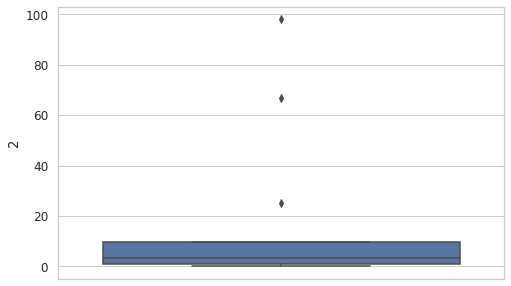

In [8]:
col = 1

average = wine_data.describe().loc['mean'].iloc[col]
print("Average of",headers[col],average)

#You can clean data by adding or replace
#wine_data_new = wine_data.dropna(inplace = True)
wine_data.iloc[col].fillna(average, inplace = True)

for x in wine_data.index:
  if wine_data.loc[x, headers[col]] > (average*3):
      wine_data.drop(x, inplace = True)


indexCol = col + 1
plotDataY = wine_data.loc[indexCol]
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
ax = sns.boxplot(y=plotDataY)
plt.show()

 

In [153]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5462.000000       5462.000000  5462.000000     5462.000000   
mean        7.195194          0.326697     0.320322        5.194269   
std         1.266838          0.145145     0.137817        4.248495   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         6.900000          0.290000     0.310000        3.000000   
75%         7.600000          0.390000     0.390000        7.900000   
max        15.900000          0.980000     1.660000       16.650000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5462.000000          5462.000000           5462.000000  5462.000000   
mean     45.893836            30.470981            116.243043     0.994452   
std      25.737362            16.601500             55.422019     0.002861   
min       0.020000             2.000000              6.000000     0.987110   
25%      34.000000            18.000000             80.000000     0.992150   
50%      44.000000            29.000000            118.000000     0.994620   
75%      57.000000            41.000000            156.000000     0.996687   
max     147.000000            89.000000            344.000000     1.002890   

                pH    sulphates      alcohol      quality        color  
count  5462.000000  5462.000000  5462.000000  5462.000000  5462.000000  
mean      3.218213     0.526562    10.567416     5.856646     0.230685  
std       0.157700     0.137624     1.201842     0.866132     0.421310  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.500000    10.400000     6.000000     0.000000  
75%       3.320000     0.600000    11.400000     6.000000     0.000000  
max       4.010000     1.560000    14.900000     9.000000     1.000000

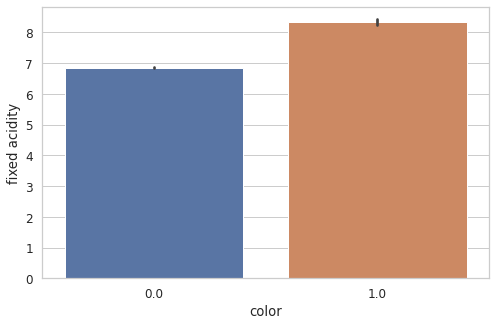

In [5]:
col = 0
indexCol = col + 1
plotDataY = y_data

y_wine = wine_data.loc[:, headers[col]]


sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
ax = sns.barplot( x = wine_class, y=y_wine )
plt.show()

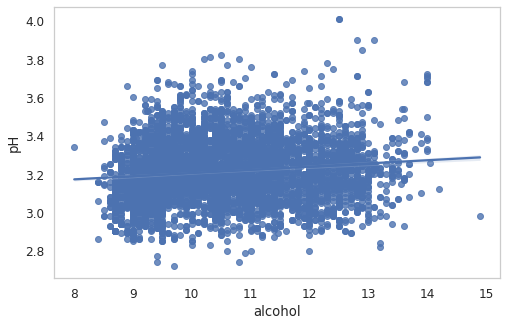

In [102]:
col1 = 10
col2 = 8
col3 = 2

col1Data = wine_data.loc[:, headers[col1]]
col2Data = wine_data.loc[:, headers[col2]]
col3Data = wine_data.loc[:, headers[col2]]

xMax = wine_data.describe().loc['mean'].iloc[col1]
yMax = wine_data.describe().loc['mean'].iloc[col2]

g = sns.regplot( x = headers[col1],
                 y=headers[col2],
                 data=wine_data,

                 
                  
                 )




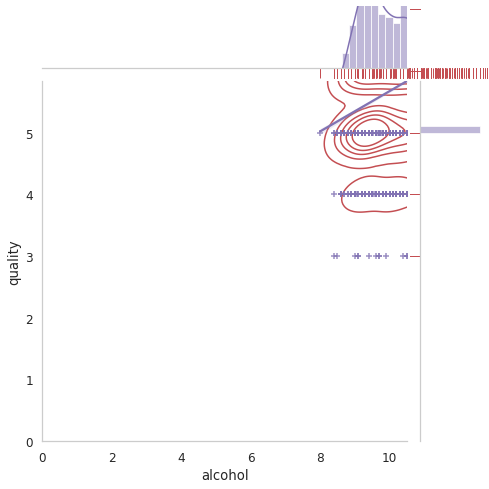

In [73]:
g = sns.jointplot( x = headers[col1], y=headers[col2],
                   data=wine_data,
                   kind="reg", 
                   xlim=(0, xMax), ylim=(0, yMax),
                   color="m", 
                   height=7,
                   marker="+",
                   #marginal_kws=dict(bins=25, fill=False),
                   )

g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [35]:
###############################################################################    Evaluation     ##############################################################################
#Functions that are needed to calculate the cost factor for the regression                      
def y_prediction(weights):
    return weights[0] * x + weights[1]

                      
def cost(weights):
    y_prediction2 = y_prediction(weights)
    mse = np.sqrt(np.mean((y_data - y_prediction2) ** 2))
    return mse

In [36]:
#create the lists witht the parameters to get an overview over the essential form 
w3 = []
y3 = []
z3 = []

for m in range(-100,100,2):
    for b in range(-20,20,1):
        weights[0] = m/10
        weights[1] = b
        mse = cost(weights)
        #Filter to only take values with a Mean squared Error of less than 5
        if mse < 5:
            w3.append(weights[0])
            y3.append(weights[1])
            z3.append(mse)

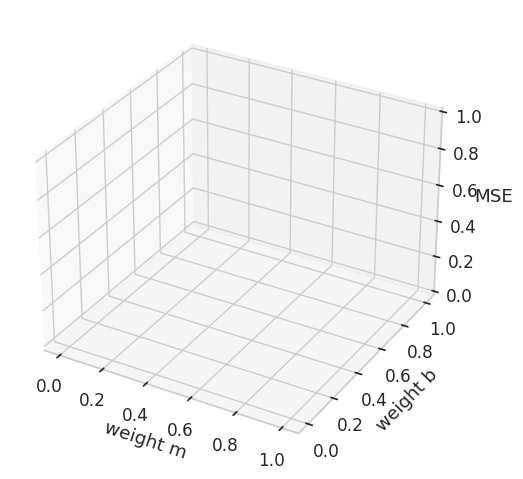

In [38]:
#define style for the plot
sns.set_style("whitegrid", {'axes.grid' : False})

#basic set up for the plot
fig3 = plt.figure(figsize=(6,6),dpi=100)
fig3.figure.set_size_inches(6,6)
ax = fig3.add_subplot(111, projection='3d')

#fill the values in the plot and define the values
ax.scatter(w3, y3, z3, c=z3, marker='o')
ax.set_xlabel('weight m')
ax.set_ylabel('weight b')
ax.set_zlabel('MSE')
plt.show()

In [37]:
#create the lists witht the parameters to get an refined view over the esential form 
w = []
y = []
z = []

for m in range(-1000,2000,1):
    for b in range(-150,100,2):
        weights[0] = m/1000
        weights[1] = b/10
        mse = cost(weights)
        #Filter to only take values with a Mean squared Error of less than 0.8
        if mse<0.8:
            w.append(weights[0])
            y.append(weights[1])
            z.append(mse)
        
     

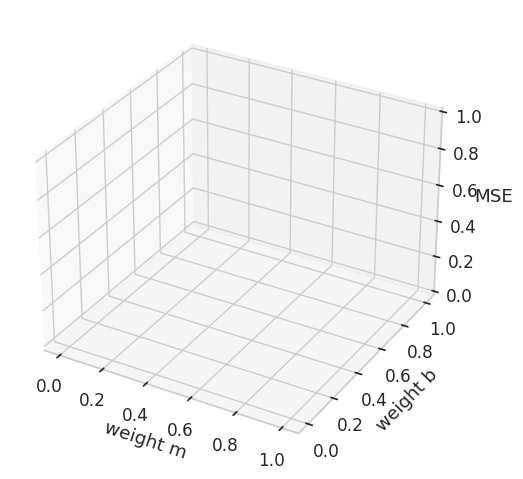

In [39]:
#basic set up for the plot layout
fig = plt.figure(figsize=(6,6),dpi=100)
fig.figure.set_size_inches(6,6)
ax = fig.add_subplot(111, projection='3d') 

#add values for the plot 
ax.scatter(w, y, z, c=z, marker='o')
ax.set_xlabel('weight m')
ax.set_ylabel('weight b')
ax.set_zlabel('MSE')

plt.show()

In [40]:
#create the lists with the parameters to get an even more refined view over the essential form 
w2 = []
y2 = []
z2 = []

for m in range(0,50000,20):
    for b in range(150,200,1):
        weights[0] = m/10000
        weights[1] = b/100
        mse = cost(weights)
        #Filter to only take values with a Mean squared Error of less than 0.74
        if mse<0.74:
            w2.append(weights[0])
            y2.append(weights[1])
            z2.append(mse)

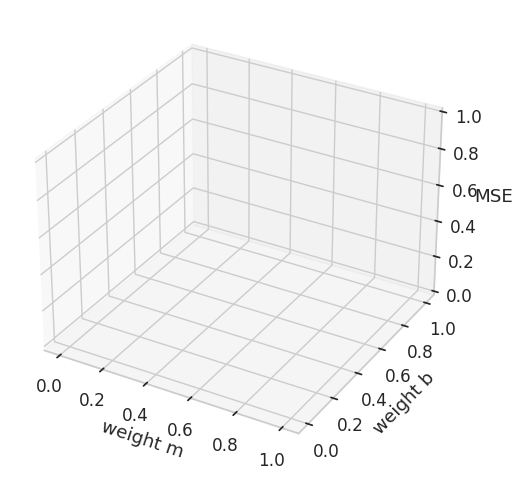

In [41]:
#basic set up for the plot layout
fig2 = plt.figure(figsize=(6,6),dpi=100)
fig2.figure.set_size_inches(6,6)
ax = fig2.add_subplot(111, projection='3d')


#add values for the plot 
ax.scatter(w2, y2, z2, c=z2, marker='o')
ax.set_xlabel('weight m ')
ax.set_ylabel('weight b ')
ax.set_zlabel('MSE')

plt.show()

In [42]:
#normalize the data by the mean
x = x*1000

#y_data = np.mean(y_data)

In [43]:
#create the lists witht the normalized parameters to get an even more refined view over the esential form 
w2_norm = []
y2_norm = []
z2_norm = []

for m in range(-3000,6000,100):
    for b in range(-15000,15000,100):
        weights[0] = m/10
        weights[1] = b/10
        mse = cost(weights)
        if mse < 10:
            w2_norm.append(weights[0])
            y2_norm.append(weights[1])
            z2_norm.append(mse)

            

In [1]:
#basic set up for the plot layout
fig2 = plt.figure(figsize=(6,6),dpi=100)
fig2.figure.set_size_inches(6,6)
ax = fig2.add_subplot(111, projection='3d')


#add values for the plot 
ax.scatter(w2_norm, y2_norm, z2_norm, c=z2_norm, marker='o')
ax.set_xlabel('weight m ')
ax.set_ylabel('weight b ')
ax.set_zlabel('MSE')

plt.show()

NameError: name 'plt' is not defined